# Funnel Analysis 

### Goal

Analayze page conversion funnel per each feature and find insight that product team should focus or find bugs & improvement point for engineers to raise the volume of sales.

### Background

This e-commerce website has four pages, 'HomePage', 'SearchPage', 'PaymentPage' and 'Confirmation Page'. 
We are trying to find out when and where the user abondon.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Load and merge the data

In [3]:
def checking():
    user = pd.read_csv("Data_funnel/user_table.csv")
    user['date'] = pd.to_datetime(user.date)
    
    homep = pd.read_csv("Data_funnel/home_page_table.csv")
    searchp = pd.read_csv("Data_funnel/search_page_table.csv")
    paymentp = pd.read_csv("Data_funnel/payment_page_table.csv")
    paymentc = pd.read_csv("Data_funnel/payment_confirmation_table.csv")
    
        
    return (print(user.shape, homep.shape, searchp.shape, paymentp.shape, paymentc.shape), 
            display(user.head(1), homep.head(1), searchp.head(1), paymentp.head(1), paymentc.head(1))) 

checking()

(90400, 4) (90400, 2) (45200, 2) (6030, 2) (452, 2)


,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female


,user_id,page
0,313593,home_page


,user_id,page
0,15866,search_page


,user_id,page
0,253019,payment_page


,user_id,page
0,123100,payment_confirmation_page


(None, None)

In [4]:
def cleaning_data():
    user = pd.read_csv("Data_funnel/user_table.csv")
    user['date'] = pd.to_datetime(user.date)
    
    homep = pd.read_csv("Data_funnel/home_page_table.csv")
    homep.page = 1
    homep.rename(columns = {'page': 'home_page'}, inplace = True)
    
    searchp = pd.read_csv("Data_funnel/search_page_table.csv")
    searchp.page = 1
    searchp.rename(columns = {'page': 'search_page'}, inplace = True)
    
    paymentp = pd.read_csv("Data_funnel/payment_page_table.csv")
    paymentp.page = 1
    paymentp.rename(columns = {'page': 'payment_page'}, inplace = True)

    paymentc = pd.read_csv("Data_funnel/payment_confirmation_table.csv")
    paymentc.page = 1
    paymentc.rename(columns = {'page': 'payment_confirmation'}, inplace = True)
    
    data = user.merge(homep, on = 'user_id', how = 'left')\
                .merge(searchp, on = 'user_id', how = 'left').fillna(0)\
                .merge(paymentp, on = 'user_id', how = 'left').fillna(0)\
                .merge(paymentc, on = 'user_id', how = 'left').fillna(0)
        
    return data

data = cleaning_data()
data

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation
0,450007,2015-02-28,Desktop,Female,1,0.0,0.0,0.0
1,756838,2015-01-13,Desktop,Male,1,0.0,0.0,0.0
2,568983,2015-04-09,Desktop,Male,1,1.0,0.0,0.0
3,190794,2015-02-18,Desktop,Female,1,1.0,0.0,0.0
4,537909,2015-01-15,Desktop,Male,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,1,0.0,0.0,0.0
90396,642989,2015-02-08,Desktop,Female,1,1.0,0.0,0.0
90397,659645,2015-04-13,Desktop,Male,1,1.0,0.0,0.0
90398,359779,2015-03-23,Desktop,Male,1,0.0,0.0,0.0


## Exploring Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id                 90400 non-null int64
date                    90400 non-null datetime64[ns]
device                  90400 non-null object
sex                     90400 non-null object
home_page               90400 non-null int64
search_page             90400 non-null float64
payment_page            90400 non-null float64
payment_confirmation    90400 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 6.2+ MB


No missing values found




## Visualizing data 



### User visits across pages per each feature - Sex, Device


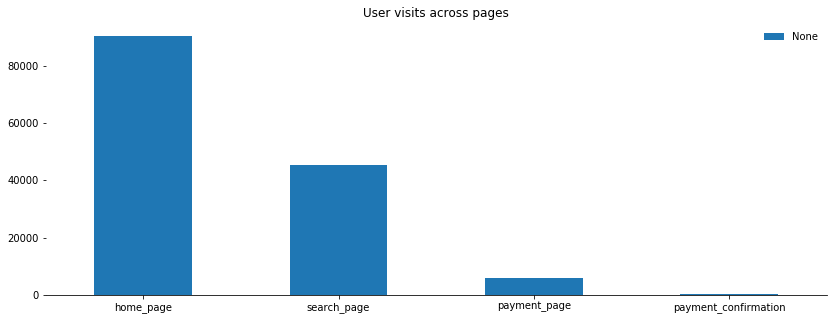

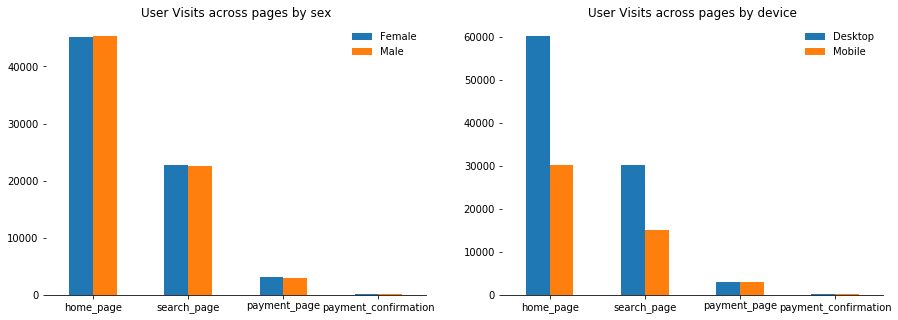

In [6]:
def chart():
    ax = data[['home_page', 'search_page', 'payment_page', 'payment_confirmation']]\
                    .sum(axis = 0)\
                    .plot(kind = 'bar', title = 'User visits across pages', rot = 0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    return ax


def chart1(by, axn):
    ax = data.groupby(by)[['home_page', 'search_page', 'payment_page', 'payment_confirmation']].sum().T\
                    .plot(kind = 'bar', title = f'User Visits across pages by {by}', rot = 0, ax = axn)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    return ax


figure, (ax1) = plt.subplots(figsize = (14,5))
chart()

figure, (ax2, ax3) = plt.subplots(1,2, figsize = (15,5))
chart1('sex', ax2)
chart1('device', ax3)
    
    

* **Sex**: Couldn't find visit number differences between male and female
* **Device**: **Visits amount per Desktop to homepage and searchpage** are two times higher, but conversion rate looks similar.  

Will explore more to see the relations with other features 

### User visits across pages per date


In [7]:
data['DayofWeek'] = data.date.dt.day_name()
data['month'] = data.date.dt.month

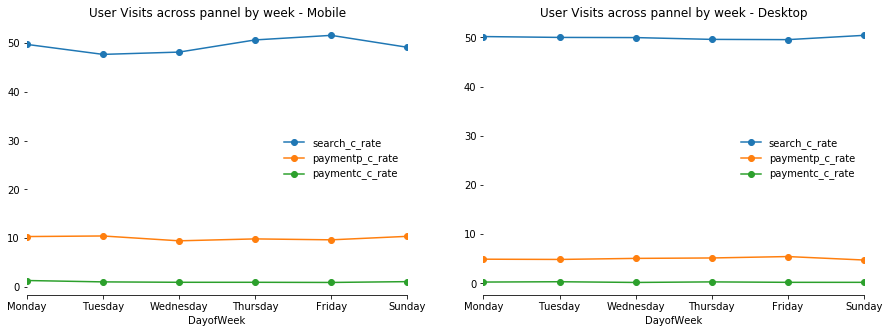

In [8]:
# User visits per dayofweek

def chartperdow(by, axn):
    dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
    ax = data[data.device == by].groupby('DayofWeek').sum()[['home_page', 'search_page', 'payment_page', 'payment_confirmation']]
    
    # Conversion rate calculation
    ax['search_c_rate'] = ax.search_page / ax.home_page * 100
    ax['paymentp_c_rate'] = ax.payment_page / ax.home_page * 100
    ax['paymentc_c_rate'] = ax.payment_confirmation / ax.home_page * 100
    
    # Making Graph
    ax = ax.reindex(dow, index = True)\
        [['search_c_rate', 'paymentp_c_rate', 'paymentc_c_rate']]\
        .plot(kind = 'line', title = f'User Visits across pannel by week - {by}'
              ,rot = 0, marker = 'o', ax = axn)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    return ax

figure, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
chartperdow('Mobile', ax1)
chartperdow('Desktop', ax2)

No specific difference per each DayofWeek

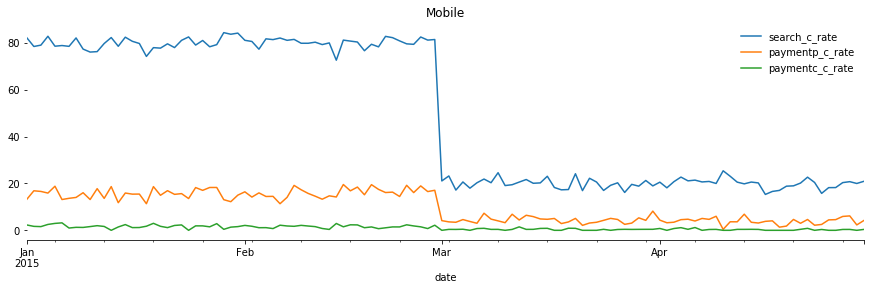

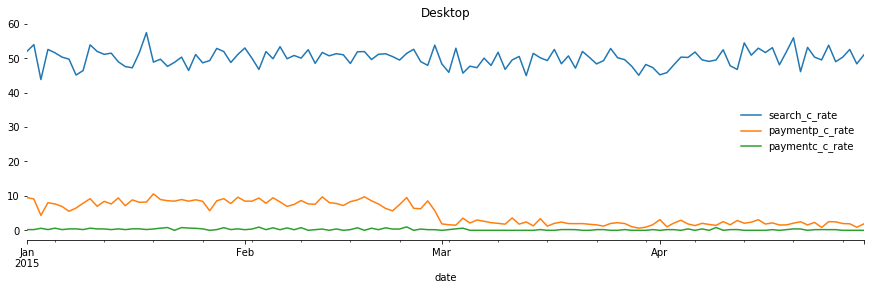

In [9]:

def chartperdate(by):
    ax = data[data.device == by].groupby('date').sum()\
                [['home_page', 'search_page', 'payment_page', 'payment_confirmation']]
                
    ax['search_c_rate'] = ax.search_page / ax.home_page * 100
    ax['paymentp_c_rate'] = ax.payment_page / ax.home_page * 100
    ax['paymentc_c_rate'] = ax.payment_confirmation / ax.home_page * 100
    ax = ax[['search_c_rate', 'paymentp_c_rate', 'paymentc_c_rate']].plot(kind = 'line', figsize = (15,4), title = by)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    return ax

chartperdate('Mobile')
chartperdate('Desktop')

    

But **for the conversion rate per date**, could confirm that there are significant reduction in the beginning of March. Trying to figure out more specific number and date

In [10]:
## Conversion rate table for specific date range to find out exact update date.

def table(device):
    table = data[data.device == device].groupby('date').sum()[['home_page', 'search_page', 'payment_page', 'payment_confirmation']]
    table['search_c_rate'] = table.search_page / table.home_page * 100
    table['paymentp_c_rate'] = table.payment_page / table.home_page * 100
    table['paymentc_c_rate'] = table.payment_confirmation / table.home_page * 100
    return table[['search_c_rate', 'paymentp_c_rate', 'paymentc_c_rate']]

table1 = table('Mobile').reset_index()
table2 = table('Desktop').reset_index()

display(table1.iloc[57:63], table2.iloc[57:63])

,date,search_c_rate,paymentp_c_rate,paymentc_c_rate
57,2015-02-27,81.203008,16.541353,0.751880
58,2015-02-28,81.454545,17.090909,2.181818
59,2015-03-01,21.074380,4.132231,0.000000
60,2015-03-02,23.200000,3.600000,0.400000
61,2015-03-03,17.175573,3.435115,0.381679
62,2015-03-04,20.642202,4.587156,0.458716


,date,search_c_rate,paymentp_c_rate,paymentc_c_rate
57,2015-02-27,47.908745,8.555133,0.190114
58,2015-02-28,53.775322,5.709024,0.184162
59,2015-03-01,48.333333,1.875000,0.000000
60,2015-03-02,45.875252,1.609658,0.201207
61,2015-03-03,52.878465,1.492537,0.426439
62,2015-03-04,45.643154,3.526971,0.622407


We can see there were update that blocks user to prceed next page were in **March 1st, 2015**

In [11]:
## Calculating Average Conversion Rate for before and after change

def table(device):
    table = data[data.device == device].groupby('month').sum()[['home_page', 'search_page', 'payment_page', 'payment_confirmation']]
    table['search_c_rate'] = table.search_page / table.home_page * 100
    table['paymentp_c_rate'] = table.payment_page / table.home_page * 100
    table['paymentc_c_rate'] = table.payment_confirmation / table.home_page * 100
    return table[['search_c_rate', 'paymentp_c_rate', 'paymentc_c_rate']]

table3 = table('Mobile')
print(f"Mobile Jan-Feb conversion rate: \n{table3.loc[:2].mean()}, \n\nMobile Mar-Apr conversion rate: \n{table3.loc[3:4].mean()}")

table4 = table('Desktop')
print(f"\n\nDesktop Jan-Feb conversion rate: \n{table4.loc[:2].mean()}, \n\nDesktop Mar-Apr conversion rate: \n{table4.loc[3:4].mean()}")


Mobile Jan-Feb conversion rate: 
search_c_rate      80.000000
paymentp_c_rate    15.827815
paymentc_c_rate     1.642384
dtype: float64, 

Mobile Mar-Apr conversion rate: 
search_c_rate      20.000000
paymentp_c_rate     4.172185
paymentc_c_rate     0.357616
dtype: float64


Desktop Jan-Feb conversion rate: 
search_c_rate      50.368771
paymentp_c_rate     8.013289
paymentc_c_rate     0.378738
dtype: float64, 

Desktop Mar-Apr conversion rate: 
search_c_rate      49.631229
paymentp_c_rate     1.986711
paymentc_c_rate     0.119601
dtype: float64


## Conclusion

#### Reduction rate of the Conversion rate 
* **Mobile** : We can figure out from these graph and table that there was change in **mobile application from 2015-03-01** that affects **search page conversion rate from 81.45% to 21.07%** and **Payment page converion rate from 17.09% to 4.1%**. Should figure out which update in Mobile application became the blocking point for the conversion rate. 
* **Desktop** : Average of the payment page conversion rate are **reduced in 2015-03-01 from 5.71% to 1.87%**, should figure out which update in the desktop webpage affected the **from search to payment conversion rate.**

#### General conversion rate between Desktop vs Mobile
Before general conversion rate reduction in 2015-03-01, Average conversion rate for mobile were much higher than desktop as below.  Not clear whether target customer prefers to use Mobile or could there be possibility to find a solution to raise desktop conversion rate.   
* Conversion rate to **search page**: 80% vs 50.36%
* Conversion rate to **payment page**: 15.82% vs 8.01%
* conversion rate to **payment confirmation**: 1.64% vs 0.37%

### Reference
Refered these two notebooks to create this notebook
* [Funnel](https://github.com/JagaRamesh/ECommerceFunnelAnalysis/blob/master/Code/funnel.ipynb)
* [Funnel Analysis](https://github.com/emindeniz/FunnelAnalysis/blob/master/Funnel_Analysis.ipynb)